In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import scipy.io
import src.utils
import src.shuffle_simulations as ss

%matplotlib inline

%reload_ext autoreload
%autoreload 2

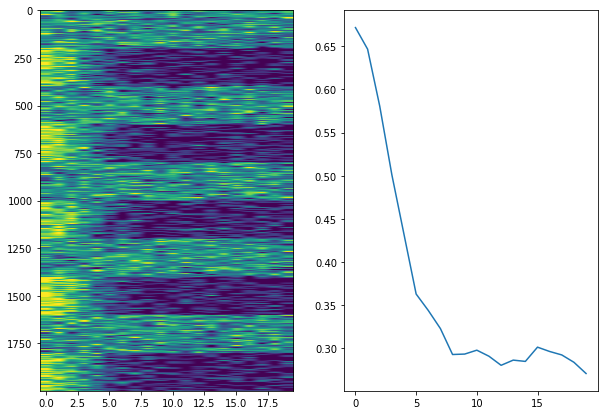

In [2]:
# np.random.seed('shuffle')
Nblocks = 1000
blocklen = 20

offset1 = 3
offset2 = 3
slope1 = 0.01
slope2 = 0.8
lapse1 = 0.1
lapse2 = 0.1

block1, t1 = ss.generate_blocks_with_sigmoid(Nblocks, blocklen, offset1, slope1, lapse1)
block2, t2 = ss.generate_blocks_with_sigmoid(Nblocks, blocklen, offset2, slope2, lapse2)
block = ss.interleave(block1, block2, Ndiv=5)


plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(block, aspect='auto')


plt.subplot(122)
plt.plot(np.mean(block, axis=0))



(-0.5, 1.0)

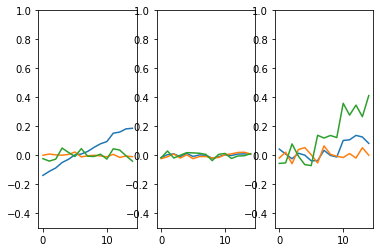

In [3]:
# Simulation on the mixed behavior
Nmax = 15
a,b,c,Xmat, y = ss.make_Xy(block, Nmax)
mdl = sklearn.linear_model.LogisticRegression()
mdl.fit(Xmat, y)

a,b,c,Xmat1, y1 = ss.make_Xy(block1, Nmax)
mdl1 = sklearn.linear_model.LogisticRegression()
mdl1.fit(Xmat1, y1)

a,b,c,Xmat2, y2 = ss.make_Xy(block2, Nmax)
mdl2 = sklearn.linear_model.LogisticRegression()
mdl2.fit(Xmat2, y2)

# Simulation of mode 1






# Simulation of mode 2


plt.subplot(131)
plt.plot(mdl.coef_[0][:Nmax]);
plt.plot(mdl1.coef_[0][:Nmax]);
plt.plot(mdl2.coef_[0][:Nmax]);

plt.ylim([-0.5, 1])

plt.subplot(132)
plt.plot(mdl.coef_[0][Nmax:2*Nmax]);
plt.plot(mdl1.coef_[0][Nmax:2*Nmax]);
plt.plot(mdl2.coef_[0][Nmax:2*Nmax]);

plt.ylim([-0.5, 1])


plt.subplot(133)
plt.plot(mdl.coef_[0][2*Nmax:3*Nmax]);
plt.plot(mdl1.coef_[0][2*Nmax:3*Nmax]);
plt.plot(mdl2.coef_[0][2*Nmax:3*Nmax]);

plt.ylim([-0.5, 1])

In [4]:
# Save data
paths = src.utils.pathsetup('matchingsim')
# scipy.io.savemat(f"{paths['codepath']}/history/shuffle_simulation_results_v3.mat", dict(block=block, 
#                     newblock=newblock, shuffleblock=shuffleblock, Xmat=Xmat, y=y,
#                     Xmat2=Xmat2, y2=y2, Xmat3=Xmat3, y3=y3, offset1=offset1, offset2=offset2,
#                     offset3=offset3, slope1=slope1, slope2=slope2, slope3=slope3,
#                     lapse1=lapse1, lapse2=lapse2, lapse3=lapse3))